# U.S. Medical Insurance Costs

## Projects Goals
To analize the differences in charges between distinct age groups of males and females
## Data
The csv file with insurance data with columns: age, sex, body mass index, number of children, smoker status, region, charges. 
## Analysis
Separate the data in female and male and then separate both in age subgroups. After that, each age subgroup will be compared between males and females

## Importing dataset


In [14]:
import csv
from statistics import mode
from matplotlib import pyplot as plt

insurance_list = []

with open('insurance.csv') as insurance_file:
    insurance_data = csv.DictReader(insurance_file)
    for item in insurance_data:
       insurance_list.append(item)

## Saving data via python variables
Here the data is splitted in female and male groups. To do this a gender group class is defined, this class will have the methods to analyse the both groups. 

In [15]:
class GenderGroup:
    def __init__(self, data, gender):
       self.gender = gender
       self.clean_data = [] 
       for item in data:
        if (gender == item['sex']):
           self.clean_data.append(item)        
    def __repr__(self):
       return "The {gender} data is a {class_data}, has {nelements} {class_item} elements with keys: {keys}.".\
format(nelements=len(self.clean_data), gender = self.gender,class_data=type(self.clean_data),\
       keys = list(self.clean_data[0].keys()), class_item = type(self.clean_data[0]))
    def get_total_number_of_elements(self):
        return( len(self.clean_data) )
    def get_keys(self):
        return list(self.clean_data[0].keys())
    def get_key_values(self, key):
        result = []
        if ( key in self.clean_data[0].keys()):
           for item in self.clean_data:
              if (item[key] in result):
                 continue   
              else:
                  result.append(item[key])
        else:
           print( "There is no {key} key in data".format(key = key) ) 
        return sorted(result)
    def split_numeric_in_groups(self, key, breaks):
        groups = {}
        for x, y in zip( breaks[:-1], breaks[1:] ):
          for item in self.clean_data:
            if ( float( item[key] ) >= x and float( item[key] ) < y):
                item_key = "{x}-{y}".format(x=int(x),y=int(y)) 
                if ( item_key in groups.keys() ):
                   groups[item_key].append(item)
                else:
                   groups[item_key] = [item]                     
        return groups
    def attribute_count_by_category(self, attr, categories, group, group_breaks):
       group_data = self.split_numeric_in_groups(group, group_breaks)
       group_keys = group_data.keys()
       attr_count = {}
       for group_key in group_keys:
         count_dict = {}   
         for item in group_data[group_key]:    
            if( item[attr] in count_dict.keys() ):
                count_dict[ item[attr] ] += 1
            else:
                count_dict[ item[attr] ]  = 1
         attr_count[group_key] = count_dict
       return attr_count
    def attribute_average_by_group(self, attr, group, group_breaks):
       group_data = self.split_numeric_in_groups(group, group_breaks)
       group_keys = group_data.keys()
       attr_average = {}
       for group_key in group_keys:
          values = []
          for item in group_data[group_key]:
             values.append( float(item[attr]) )
          attr_average[group_key] = sum(values)/len(values)
       return attr_average
    def attribute_median_by_group(self, attr, group, group_breaks):
       group_data = self.split_numeric_in_groups(group, group_breaks)
       group_keys = group_data.keys()
       attr_mode = {}
       for group_key in group_keys:
          values = []
          for item in group_data[group_key]:
             values.append( float(item[attr]) )
          attr_mode[group_key] = median(values)
       return attr_mode
    def attribute_mode_by_group(self, attr, group, group_breaks):
       group_data = self.split_numeric_in_groups(group, group_breaks)
       group_keys = group_data.keys()
       attr_mode = {}
       for group_key in group_keys:
          values = []
          for item in group_data[group_key]:
             values.append( float(item[attr]) )
          attr_mode[group_key] = mode(values)
       return attr_mode



The function **side_by_side_barplot** is used to plot side-by-side bar plots to compare factors that can be related with the ensurance costs. The imputs are a dictionary list with data splitted by gender, the axis label, title and legend of the plot. 

In [16]:
def side_by_side_barplot(dictionaries_list,xlabel, ylabel, title, legend):
    t = len( dictionaries_list ) # number of datasets
    d = len( dictionaries_list[0].keys() ) # number of barsets
    w = 0.8  # width of bars
    posX = []
    x_ticks = []
    for n in range( t ): # calculating x position of each bar set
        posX.append( [t*element + w*n for element in range(d)] )
    xticks = [ x + 0.5*w for x in posX[0] ]
    plt.figure(figsize=[13,7])
    ax = plt.subplot()
    for n in range(t): 
      plt.bar(posX[n],dictionaries_list[n].values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,size=17)
    plt.legend(legend)
    ax.set_xticks( xticks )
    ax.set_xticklabels( dictionaries_list[0].keys() )
    plt.show()

Here the data has been separated in two classes, male_data and female_data. Each class has the same methods to calculate the statistics

In [17]:
male_data = GenderGroup(insurance_list, 'male')  # male data
female_data = GenderGroup(insurance_list, 'female')  # female data
print(male_data) # view the representation of male_data
age = [float(x) for x in male_data.get_key_values('age')] # get the ages from the samples to build the ages intervals 
delta = max(age) - min(age) # The main age interval
n_breaks = 10 # Number of age groups
age_breaks = [ min(age) + round(delta*x/n_breaks) for x in range(0,n_breaks+1) ] # calculating the age breaks
age_breaks[-1] = age_breaks[-1] + 1 # adding one to the last break to incude all the data
male_age_groups = male_data.split_numeric_in_groups('age', age_breaks) # slice the male data in age groups, the result is a dictionary
female_age_groups = female_data.split_numeric_in_groups('age', age_breaks) # slice the female data in age groups, the result is a dictionary


The male data is a <class 'list'>, has 676 <class 'dict'> elements with keys: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'].


##  Average charges by sex

The charges average are calculated by each age group for male and female using the attribute_average_by_group method. After that the **side_by_side_barplot** function is used to plot the side-by-side bar plot. In almost all the ages groups the males had higher insurance charges, except in the 23-27 years group where female had higher insurance cost than male. 

Two questions arise from this plot
1. Which factors contribute to the heighest insurance cost for males?
2. Why the women in the 23-27 Years group pay more than males?

To get an answer let's get to investigate the BMI, Children and Smoker attributes, it is very likelly that these attributes determine the difference in the insurance costs between males and females.


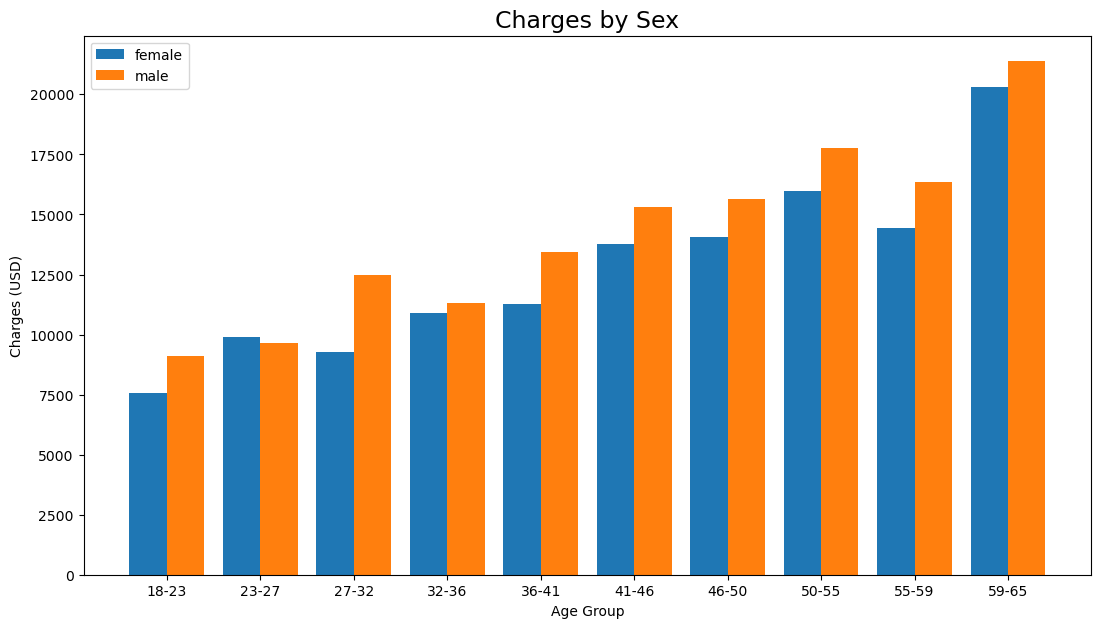

In [18]:
male_charges_average = male_data.attribute_average_by_group('charges', 'age', age_breaks) # Dictionary with charges average of each age group of males
female_charges_average = female_data.attribute_average_by_group('charges', 'age', age_breaks) # Dictionary with charges average of each age group of females
side_by_side_barplot([female_charges_average, male_charges_average],'Age Group', 'Charges (USD)', 'Charges by Sex', ['female', 'male']) # side-by-side-bar-plot

Here the differences in insurance costs between males and females are plotted in a bar plot, just in the 23-27 Years group the female pay more than male as pointed earlier. Maybe the pregnancy status of those women? Unfortunatelly the is no pregnancy status data. Or there is a problem with the insurance cost formula for that Age group?

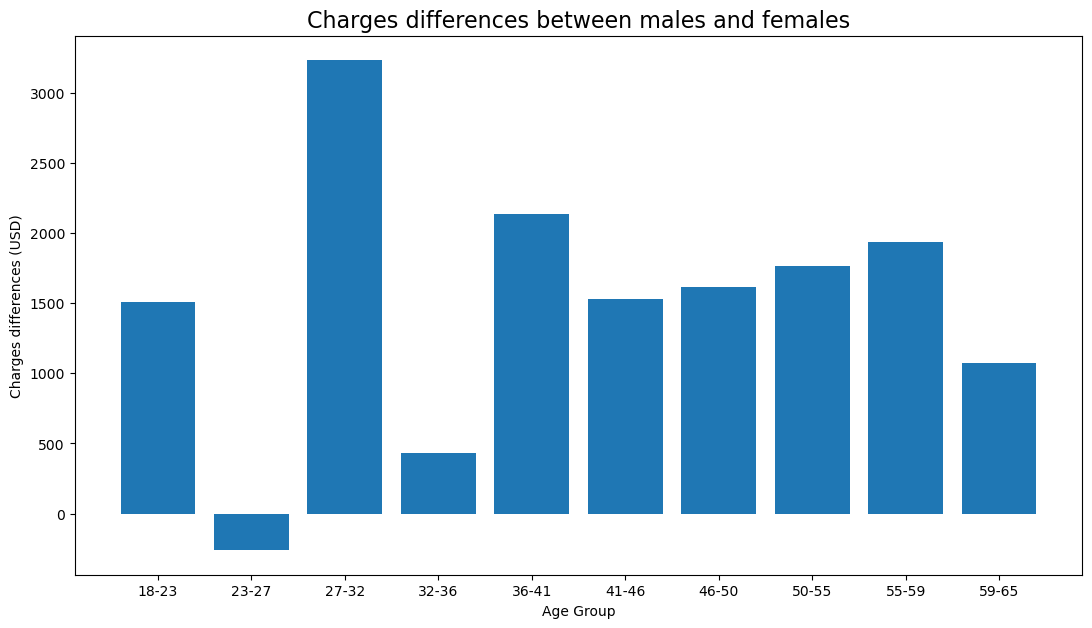

In [19]:
charges_differences = [ x - y for x,y in  zip(male_charges_average.values(), female_charges_average.values() ) ]
plt.figure(figsize=(13,7))
plt.bar( list(male_charges_average.keys()), charges_differences)
plt.title('Charges differences between males and females', size = 16)
plt.ylabel('Charges differences (USD)')
plt.xlabel( 'Age Group' )
plt.show()

Here the bar plot of the children number attribute is shown. The mode is used because has more sense tha average (1.5 children does not make sense). There is no evidence for the differences in insurance costs between males an females. 

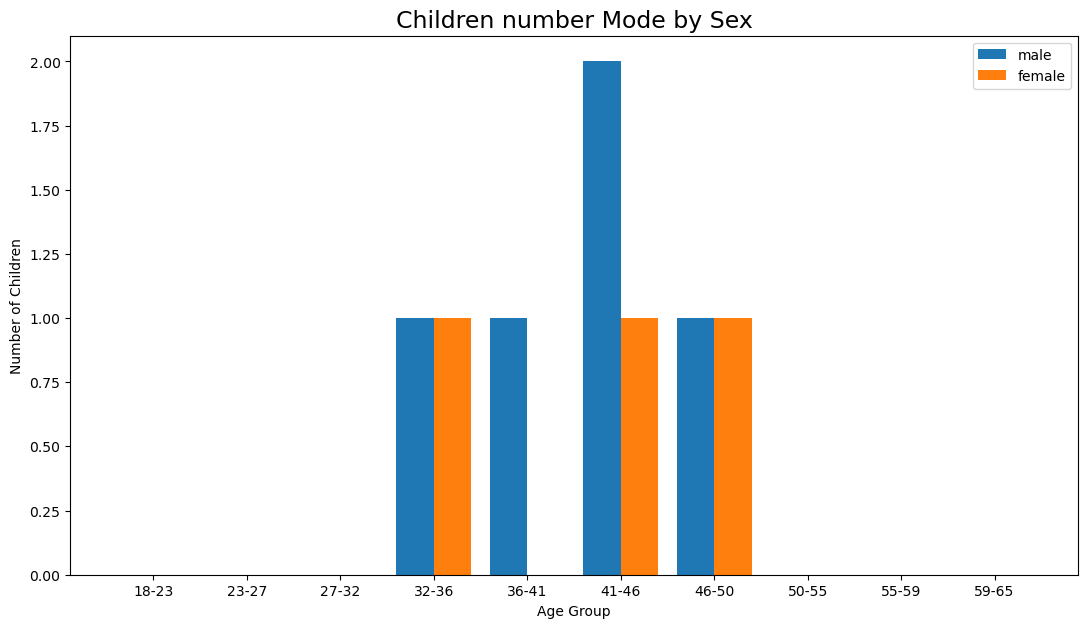

In [20]:
female_children = female_data.attribute_mode_by_group('children', 'age', age_breaks)
male_children = male_data.attribute_mode_by_group('children', 'age', age_breaks)
side_by_side_barplot([male_children, female_children], 'Age Group', 'Number of Children', 'Children number Mode by Sex', ['male', 'female'])

The body mass index (BMI) is presented, the males had more BMI tha female in almos all the ages gorup, except in the 50-55. However, there is not to much differences in the BMI, so this attribute is not so determinant in the insurance costs, or the BMI weight in the insurance cost formula is high.

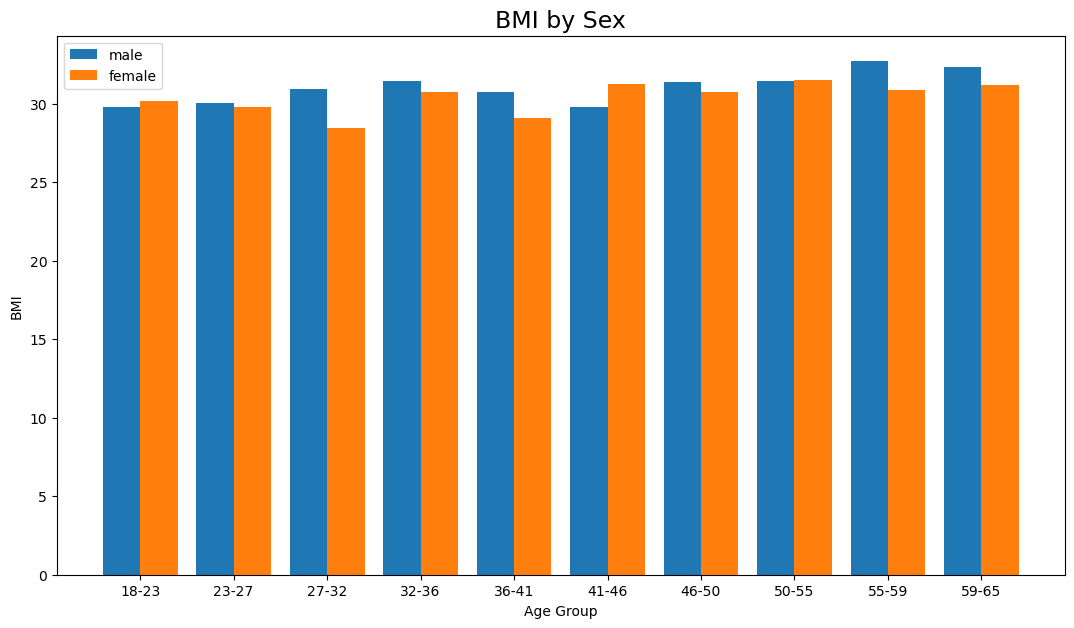

In [21]:
female_bmi = female_data.attribute_average_by_group('bmi','age', age_breaks)
male_bmi = male_data.attribute_average_by_group('bmi','age', age_breaks)
side_by_side_barplot([male_bmi, female_bmi],'Age Group', 'BMI', 'BMI by Sex', ['male', 'female'])

The smoker percent by sex is presented. Here, is evident that men smoke more than women. Also, it is shown that the youngest people has the highest smoke percentage in men and women. It's seems that this attribute rise the insurance costs along with the BMI.

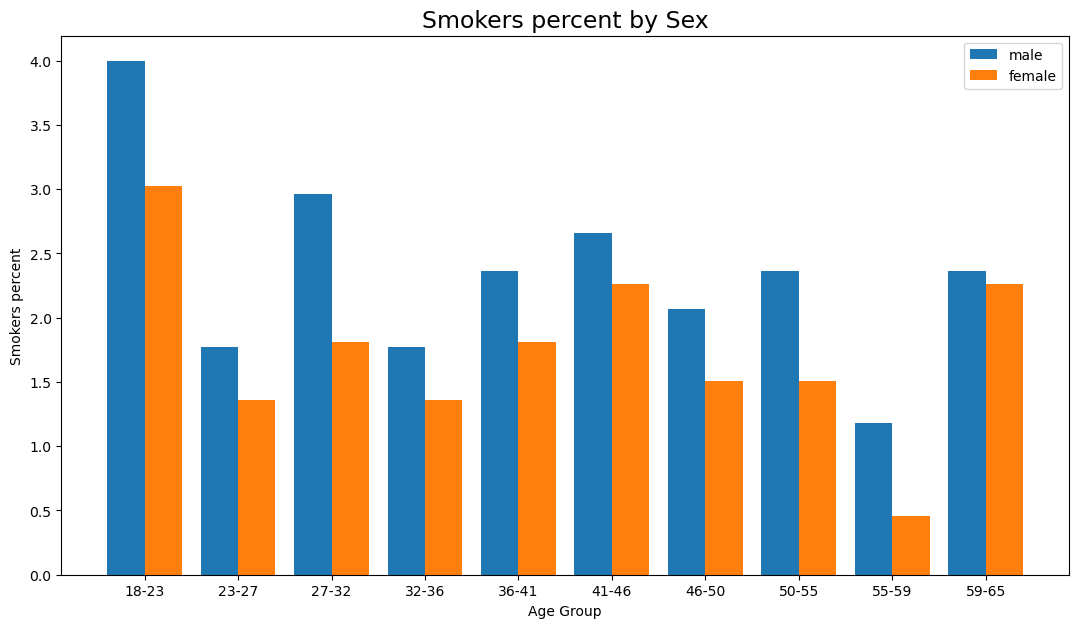

In [22]:
male_smoker = male_data.attribute_count_by_category('smoker', ['yes', 'no'], 'age', age_breaks) # dictionary with male smok status
female_smoker = female_data.attribute_count_by_category('smoker', ['yes', 'no'], 'age', age_breaks) # dictionary with female smok status
total_male = male_data.get_total_number_of_elements() # total male of individuals
total_female = female_data.get_total_number_of_elements() # total female of individuals
male_smoker_percent = [ 100.0*male_smoker[item ]['yes']/( total_male ) for item in male_smoker ] # male smokers percentage
female_smoker_percent = [ 100.0*female_smoker[item ]['yes']/( total_female ) for item in female_smoker ] # female smokers percentage

male_smoker_percent_dict = {}
for key, values in zip(male_smoker.keys(), male_smoker_percent):
   male_smoker_percent_dict[key] = values # bulding the male_smokers_percentage dictionary

female_smoker_percent_dict = {}
for key, values in zip(female_smoker.keys(), female_smoker_percent):
   female_smoker_percent_dict[key] = values # bulding the female_smokers_percentage dictionary


side_by_side_barplot([male_smoker_percent_dict, female_smoker_percent_dict],'Age Group', 'Smokers percent', 'Smokers percent by Sex', ['male', 'female'])

Also, the regions data are shown grouped by sex and ages. In all the regions the 18-23 age group has highest percentage of male and female. There is no evidence of influence of the region in the insurance costs. 

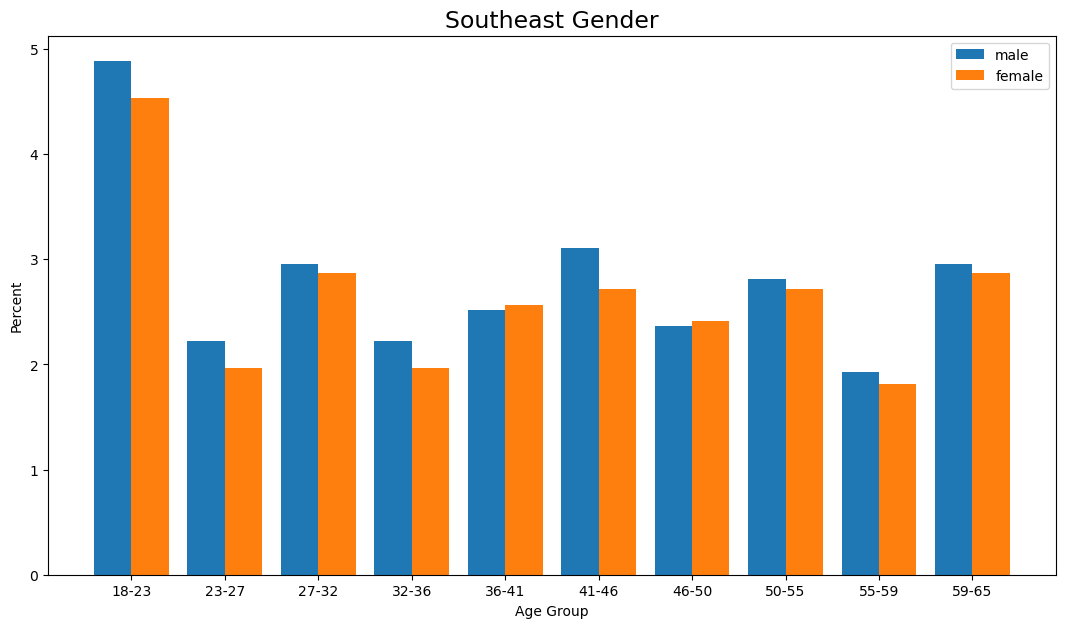

In [23]:
male_by_region = male_data.attribute_count_by_category('region', male_data.get_key_values('region'), 'age', age_breaks) 
female_by_region = female_data.attribute_count_by_category('region', female_data.get_key_values('region'), 'age', age_breaks)

def percent_by_region(dict, key_region, total):
   result_dict = {}
   for item in dict:
      result_dict[item] = 100.0*dict[item][key_region]/total
   return result_dict 

male_southeast = percent_by_region(male_by_region, 'southeast', total_male)
female_southeast = percent_by_region(female_by_region, 'southeast', total_female)

side_by_side_barplot([male_southeast, female_southeast],'Age Group', 'Percent', 'Southeast Gender', ['male', 'female'])


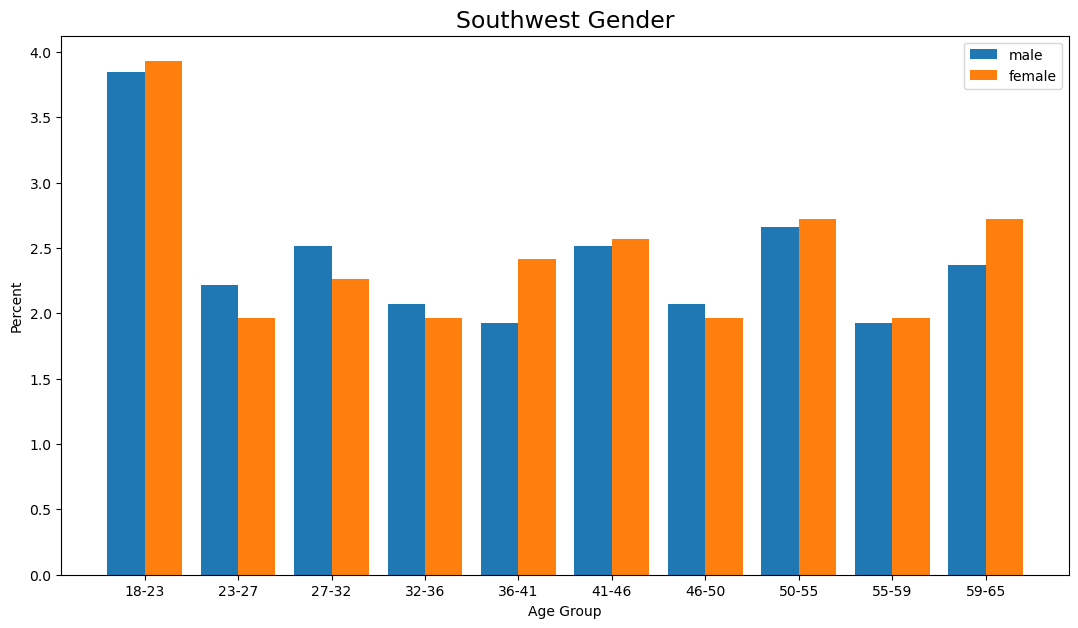

In [24]:
male_southwest = percent_by_region(male_by_region, 'southwest', total_male)
female_soutwest = percent_by_region(female_by_region, 'southwest', total_female)

side_by_side_barplot([male_southwest, female_soutwest],'Age Group', 'Percent', 'Southwest Gender', ['male', 'female'])


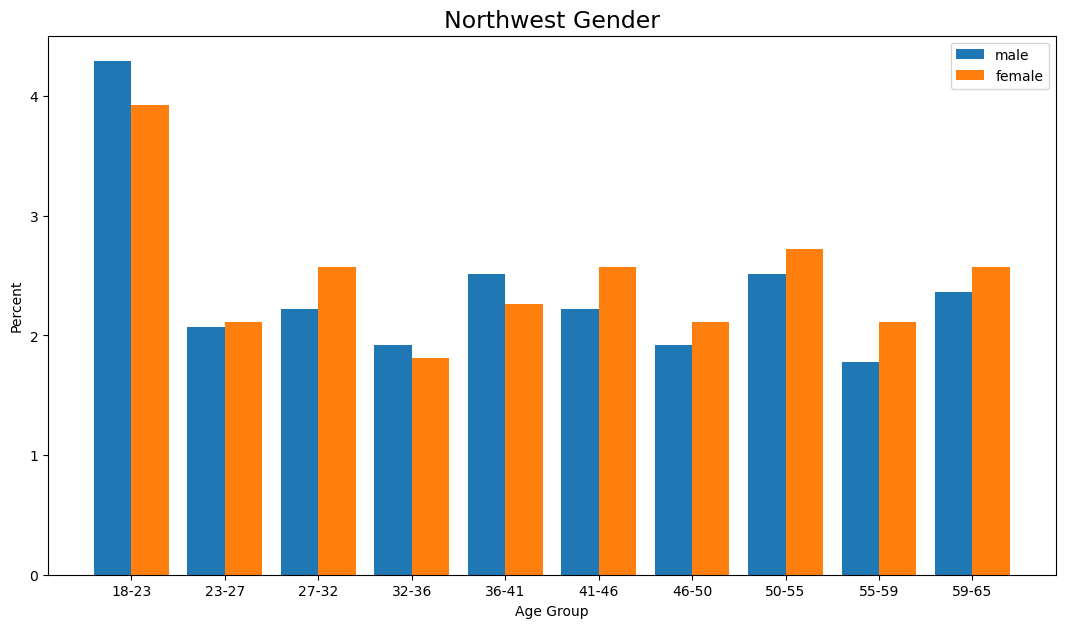

In [25]:
male_northwest = percent_by_region(male_by_region, 'northwest', total_male)
female_northwest = percent_by_region(female_by_region, 'northwest', total_female)

side_by_side_barplot([male_northwest, female_northwest],'Age Group', 'Percent', 'Northwest Gender', ['male', 'female'])


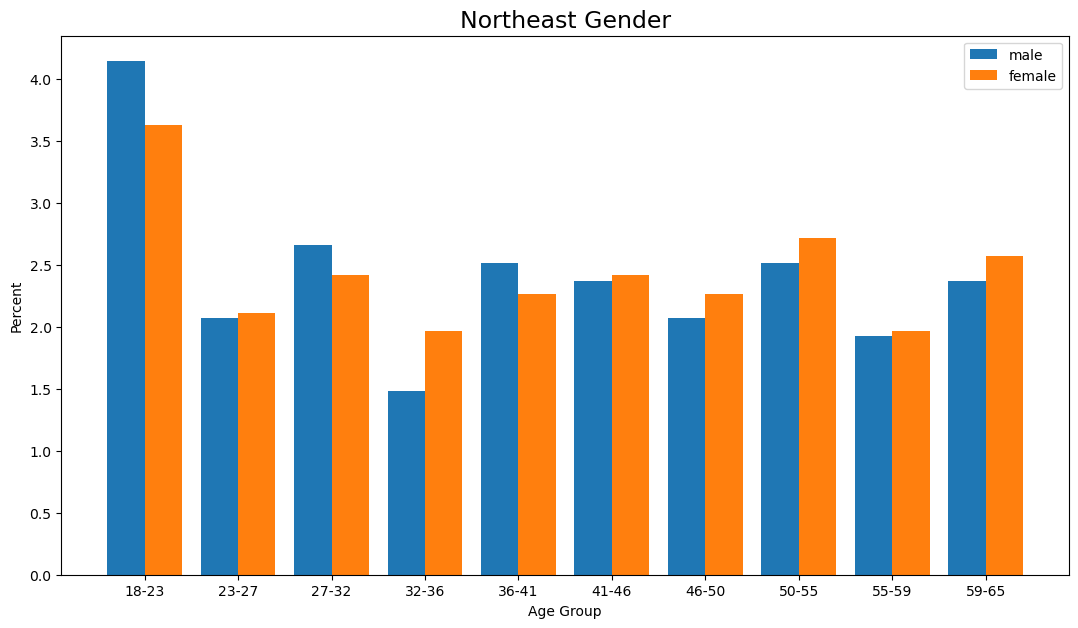

In [26]:
male_northeast = percent_by_region(male_by_region, 'northeast', total_male)
female_northeast = percent_by_region(female_by_region, 'northeast', total_female)

side_by_side_barplot([male_northeast, female_northeast],'Age Group', 'Percent', 'Northeast Gender', ['male', 'female'])

## Conclusion
The attributes that contribute to the difference in insurance costs between males and females are body mass index and smoker status. So, in order to get down the insurance cost is recomended to get down the body mass index and do not smoke. 